In [ ]:
# Import Zip File
from google.colab import files
uploaded = files.upload()

Saving myntradataset.zip to myntradataset.zip


Unzip

In [ ]:
# File Unzip
import zipfile
!unzip /content/myntradataset.zip 

Streaming output truncated to the last 5000 lines.
  inflating: myntradataset/images/58129.jpg  
  inflating: myntradataset/images/5813.jpg  
  inflating: myntradataset/images/58131.jpg  
  inflating: myntradataset/images/58132.jpg  
  inflating: myntradataset/images/58133.jpg  
  inflating: myntradataset/images/58135.jpg  
  inflating: myntradataset/images/58136.jpg  
  inflating: myntradataset/images/58137.jpg  
  inflating: myntradataset/images/58138.jpg  
  inflating: myntradataset/images/58139.jpg  
  inflating: myntradataset/images/5814.jpg  
  inflating: myntradataset/images/58140.jpg  
  inflating: myntradataset/images/58141.jpg  
  inflating: myntradataset/images/58143.jpg  
  inflating: myntradataset/images/58144.jpg  
  inflating: myntradataset/images/58145.jpg  
  inflating: myntradataset/images/58146.jpg  
  inflating: myntradataset/images/58147.jpg  
  inflating: myntradataset/images/58148.jpg  
  inflating: myntradataset/images/58149.jpg  
  inflating: myntradataset/imag

Populating the interactive namespace from numpy and matplotlib


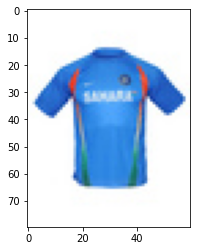

In [ ]:
# Image Plot
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('/content/myntradataset/images/1163.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Read Image
import cv2
img = cv2.imread('/content/myntradataset/images/1163.jpg', cv2.IMREAD_UNCHANGED)
 
# Get dimensions of image
dimensions = img.shape

print('Image Dimension    : ',dimensions)

Image Dimension    :  (80, 60, 3)


In [ ]:
# Required library
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

from keras.applications.vgg16 import VGG16

import pandas as pd
import numpy as np

In [ ]:
# Import CSV
data = pd.read_csv("/content/myntradataset/styles.csv", error_bad_lines=False)

b'Skipping line 6044: expected 10 fields, saw 11\nSkipping line 6569: expected 10 fields, saw 11\nSkipping line 7399: expected 10 fields, saw 11\nSkipping line 7939: expected 10 fields, saw 11\nSkipping line 9026: expected 10 fields, saw 11\nSkipping line 10264: expected 10 fields, saw 11\nSkipping line 10427: expected 10 fields, saw 11\nSkipping line 10905: expected 10 fields, saw 11\nSkipping line 11373: expected 10 fields, saw 11\nSkipping line 11945: expected 10 fields, saw 11\nSkipping line 14112: expected 10 fields, saw 11\nSkipping line 14532: expected 10 fields, saw 11\nSkipping line 15076: expected 10 fields, saw 12\nSkipping line 29906: expected 10 fields, saw 11\nSkipping line 31625: expected 10 fields, saw 11\nSkipping line 33020: expected 10 fields, saw 11\nSkipping line 35748: expected 10 fields, saw 11\nSkipping line 35962: expected 10 fields, saw 11\nSkipping line 37770: expected 10 fields, saw 11\nSkipping line 38105: expected 10 fields, saw 11\nSkipping line 38275: ex

In [ ]:
data.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
print('Number of Categories    : ', len(unique(data['masterCategory'])))
print('Category names   : ', unique(data['masterCategory']))

Number of Categories    :  7
Category names   :  ['Accessories' 'Apparel' 'Footwear' 'Free Items' 'Home' 'Personal Care'
 'Sporting Goods']


In [ ]:
# Shape of the data
data.shape

(44424, 10)

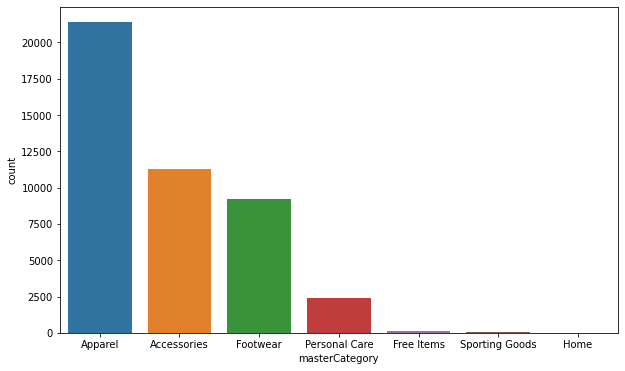

In [ ]:
# Target Variable plot
import seaborn as sns

plt.figure(figsize=(10,6))

#Target variable count
sns.countplot(data = data, x = 'masterCategory')

In [ ]:
# Target Variable count
data['masterCategory'].value_counts()

Apparel           21397
Accessories       11274
Footwear           9219
Personal Care      2403
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64

In [ ]:
# Dataframe Copy
df = data.copy()

In [ ]:
df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [ ]:
# Removing Categories with less than 2000 entries (for computation)
counts = df['masterCategory'].value_counts()
new_df = df.loc[df['masterCategory'].isin(counts.index[counts > 2000])]

In [ ]:
# New category count
new_df['masterCategory'].value_counts()

Apparel          21397
Accessories      11274
Footwear          9219
Personal Care     2403
Name: masterCategory, dtype: int64

In [ ]:
# LabelEncoding target variable

from sklearn.preprocessing import LabelEncoder

labelencorder = LabelEncoder()
new_df['masterCategory_N'] = labelencorder.fit_transform(new_df['masterCategory'])
new_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,masterCategory_N
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,1
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,1
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,0
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,1
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,1


In [ ]:
# Dataset shape

new_df.shape

(44293, 11)

In [ ]:
# Taking 25000 samples for computaion

df_n = new_df.sample(n = 25000)

In [ ]:
df_n.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,masterCategory_N
15327,15076,Women,Apparel,Topwear,Kurtas,White,Fall,2011.0,Ethnic,Mother Earth Women Printed White Kurtas,1
9570,19830,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,U.S. Polo Assn. Men Check Navy Blue Shirt,1
36457,29015,Men,Apparel,Topwear,Tshirts,Blue,Summer,2012.0,Casual,ADIDAS Men Dassler Blue T-shirt,1
11043,1927,Unisex,Accessories,Bags,Backpacks,Navy Blue,Summer,2011.0,Sports,Domyos Navy Blue Bag,0
10957,7816,Women,Footwear,Shoes,Casual Shoes,Black,Fall,2011.0,Casual,Puma Women Corsica Mid L Shine Black Grey Shoe,2


In [ ]:
# Indexing order

df_n = df_n.reset_index(drop=True)
df_n.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,masterCategory_N
0,49618,Women,Footwear,Shoes,Heels,Black,Winter,2015.0,Casual,Catwalk Women Bronze Heels,2
1,58687,Women,Apparel,Topwear,Kurtas,White,Summer,2012.0,Ethnic,ALayna Women Printed White Kurta,1
2,31322,Women,Apparel,Topwear,Kurtas,Blue,Summer,2012.0,Ethnic,Aurelia Women Printed Blue Kurta,1
3,11586,Women,Apparel,Topwear,Kurtas,Beige,Summer,2011.0,Ethnic,W Women Printed Beige Kurtas,1
4,25361,Men,Apparel,Innerwear,Trunk,Black,Summer,2016.0,Casual,Levis Men Black & Green Trunks,1


In [ ]:
# Shape of the dataset
df_n.shape

(25000, 11)

In [ ]:
df_n['masterCategory'].value_counts()

Apparel          12096
Accessories       6286
Footwear          5230
Personal Care     1388
Name: masterCategory, dtype: int64

In [ ]:
df_n['masterCategory_N'].value_counts()

1    12096
0     6286
2     5230
3     1388
Name: masterCategory_N, dtype: int64

In [ ]:
# Combining image with id(Target variable)

import os.path

img_cat = []
for i in tqdm(range(df_n.shape[0])):
    if os.path.exists('/content/myntradataset/images/'+str(df_n['id'][i])+'.jpg') == True:
        img = image.load_img('/content/myntradataset/images/'+str(df_n['id'][i])+'.jpg',target_size=(96,96,3))
        img = image.img_to_array(img)
        # Normalizing
        img = img/255
        class_num = df_n['masterCategory_N'][i]
        img_cat.append([img, class_num])


100%|██████████| 25000/25000 [00:16<00:00, 1481.15it/s]


In [ ]:
# Splitting independent and target variables
X =[]
y =[]
for features, label in tqdm(img_cat):
  X.append(features)
  y.append(label)

100%|██████████| 25000/25000 [00:00<00:00, 1115886.26it/s]


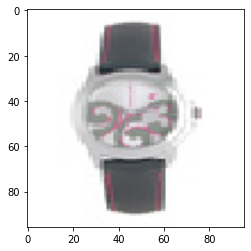

In [ ]:
# Plot from X

plt.imshow(X[11])

In [ ]:
# Target value

y[11]

0

In [ ]:
# Converting to array

X_np = np.array(X)
X_np.shape

(25000, 96, 96, 3)

In [ ]:
# Coverting target

#from keras.utils import np_utils
#Y_np = np_utils.to_categorical(y, 4)
Y_np = np.array(y)

print(Y_np[11])
print(shape(Y_np))

2
(25000,)


In [ ]:
# Train Test split

X_train, X_test, y_train, y_test = train_test_split(X_np, Y_np, test_size = 0.3, random_state = 4)

In [ ]:
# Network parameters

input_shape = (96, 96, 3)
batch_size = 36
kernel_size = 3
filters = 64
dropout = 0.3
num_labels = len(unique(y))
print(num_labels)

4


In [ ]:
# Functional API to build cnn layers

inputs = Input(shape=input_shape)
conv1 = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
pool1 = MaxPooling2D()(conv1)
conv2 = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(pool1)
pool2 = MaxPooling2D()(conv2)
conv3 = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(pool2)

# image to vector before connecting to dense layer
flat1 = Flatten()(conv3)

# dropout regularization
drop1 = Dropout(dropout)(flat1)

# output for classification
outputs = Dense(num_labels, activation='softmax')(drop1)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)

# output to extract features
outputs1 = Dense(1024, activation='relu')(drop1)

# build the model by supplying inputs/flatten layer (to extract features)
model1 = Model(inputs=inputs, outputs=outputs1)


In [ ]:
# network model in text
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 64)        36928 

In [ ]:
# classifier loss, Adam optimizer, classifier accuracy
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# train the model with input images and labels
r = model.fit(X_train,
          y_train,
          validation_data=(X_test, y_test),
          epochs=10,
          batch_size=batch_size)

# model accuracy on test dataset
score = model.evaluate(X_test,
                       y_test,
                       batch_size=batch_size,
                       verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))

Epoch 1/10
487/487 [==============================] - 409s 837ms/step - loss: 0.2791 - accuracy: 0.9017 - val_loss: 0.1713 - val_accuracy: 0.9452
Epoch 2/10
487/487 [==============================] - 405s 831ms/step - loss: 0.1308 - accuracy: 0.9587 - val_loss: 0.1145 - val_accuracy: 0.9632
Epoch 3/10
487/487 [==============================] - 403s 828ms/step - loss: 0.1017 - accuracy: 0.9674 - val_loss: 0.0968 - val_accuracy: 0.9673
Epoch 4/10
487/487 [==============================] - 404s 829ms/step - loss: 0.0784 - accuracy: 0.9757 - val_loss: 0.1166 - val_accuracy: 0.9681
Epoch 5/10
487/487 [==============================] - 410s 842ms/step - loss: 0.0634 - accuracy: 0.9788 - val_loss: 0.1143 - val_accuracy: 0.9640
Epoch 6/10
487/487 [==============================] - 410s 842ms/step - loss: 0.0570 - accuracy: 0.9817 - val_loss: 0.1024 - val_accuracy: 0.9720
Epoch 7/10
487/487 [==============================] - 411s 843ms/step - loss: 0.0456 - accuracy: 0.9842 - val_loss: 0.0919 -

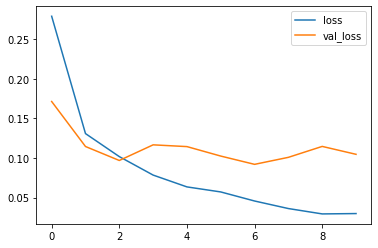

In [ ]:
# Plot for loss

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

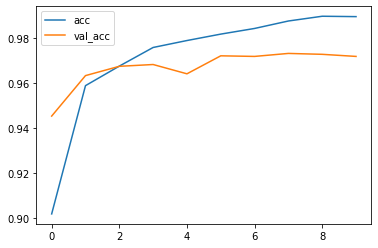

In [ ]:
# plot for accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

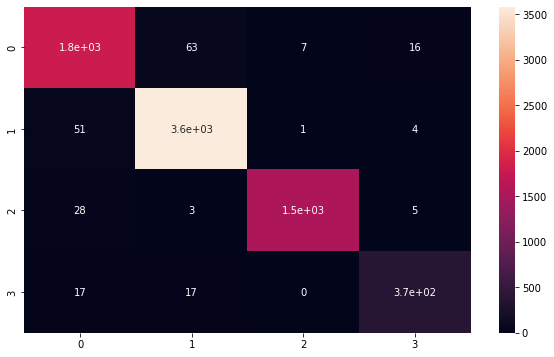

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

import seaborn as sns


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)

plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True)

In [ ]:
# Target labels
labels = '''Accessories
Apparel
Footwear
Personal Care'''.split()

Text(0.5, 1.0, 'True label: Apparel vs Predicted: Accessories')

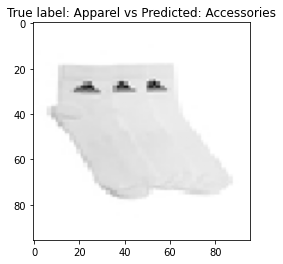

In [ ]:
# Misclassified image
misclassified = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified)
plt.imshow(X_test[i])
plt.title("True label: %s vs Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

Clustering (Reverse Image Search)

In [ ]:
img_path = "/content/myntradataset/images/"

In [ ]:
# Extract features function 
def extract_features(img_path, model):
    input_shape = (96, 96, 3)
    img = image.load_img(img_path, target_size=(
        input_shape[0], input_shape[1]))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    #preprocessed_img = preprocess_input(expanded_img_array)
    features = model.predict(expanded_img_array)
    flattened_features = features.flatten()
    normalized_features = flattened_features / norm(flattened_features)
    return normalized_features

In [ ]:
# Extracted feature length for single image
features = extract_features("/content/myntradataset/images/52775.jpg", model1)
print(len(features))

1024


In [ ]:
# Feature extraction from model1
feature_list = []
for i in tqdm(range(df_n.shape[0])):
    if os.path.exists('/content/myntradataset/images/'+str(df_n['id'][i])+'.jpg') == True:
        feature_list.append([extract_features("/content/myntradataset/images/"+str(df_n['id'][i])+".jpg", model1), str(df_n['id'][i])])

100%|██████████| 25000/25000 [28:38<00:00, 14.55it/s]


In [ ]:
# Features dataframe
feature_list_df = pd.DataFrame(data=feature_list, columns=["features", "id"])

In [ ]:
feature_list_df.head()

,features,id
0,"[0.0, 0.038381446, 0.061443005, 0.0039243936, ...",15076
1,"[0.0, 0.0935811, 0.0, 0.0, 0.0, 0.067373164, 0...",19830
2,"[0.0, 0.058325455, 0.0, 0.0, 0.0, 0.05506254, ...",29015
3,"[0.0, 0.0, 0.09004537, 0.015540328, 0.0, 0.022...",1927
4,"[0.0, 0.0, 0.0, 0.058300905, 0.0095357485, 0.1...",7816


In [ ]:
feature_list_df.shape

(24997, 2)

In [ ]:
feature_list_df['features'][0]

array([0.        , 0.03838145, 0.061443  , ..., 0.        , 0.0094832 ,
       0.02005287], dtype=float32)

In [ ]:
feature_list[0]

array([0.        , 0.03838145, 0.061443  , ..., 0.        , 0.0094832 ,
       0.02005287], dtype=float32)

In [ ]:
# Euclidean distance measure
from scipy.spatial.distance import euclidean
row1 = feature_list_df['features'][0]
row2 = feature_list_df['features'][1]
dist = euclidean(row1, row2)
print(dist)

1.0044209957122803


In [ ]:
features = extract_features("/content/myntradataset/images/52775.jpg", model1)
print(len(features))

In [ ]:
# Distance calculation
distance_list = []
input_row = extract_features("/content/myntradataset/images/52775.jpg", model1)
for feature, i in feature_list_df.itertuples(index=False):
    dist = euclidean(feature, input_row)
    distance_list.append([dist, i])

In [ ]:
# Dataframe 
distance_df = pd.DataFrame(data=distance_list, columns=["distance", "id"])

In [ ]:
# Top 5 similar products
distance_df_sort = distance_df.sort_values('distance').head()
print(distance_df_sort)

       distance     id
18298  0.000000  52775
1798   0.088038  52774
7275   0.308619  58263
17766  0.339119  33604
24180  0.362776  17115


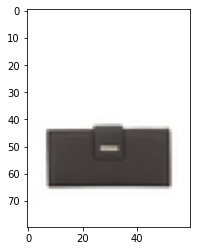

In [ ]:
# Image plot
img = mpimg.imread('/content/myntradataset/images/52774.jpg')
imgplot = plt.imshow(img)
plt.show()

[0]


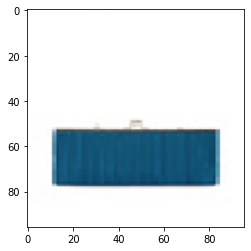

In [ ]:
# Product and pridicted label
img_c = image.load_img('/content/myntradataset/images/'+str(17115)+'.jpg',target_size=(96,96,3))
img_c = image.img_to_array(img_c)
# Normalizing
img_c = img_c/255
img_c = np.array(img_c)
img_cd = np.expand_dims(img_c, axis=0)
p = model.predict(img_cd).argmax(axis=1)
print("Predicted: %s" % (p))
plt.imshow(img_c)
#plt.title("Predicted: %s" % (labels[p]))

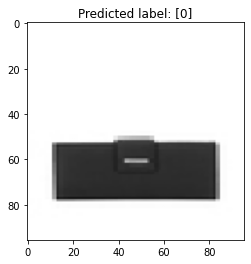

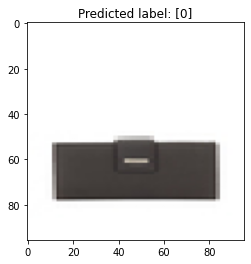

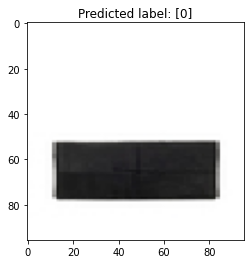

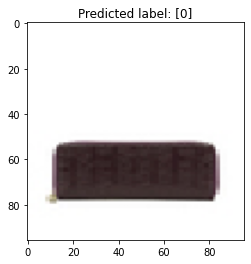

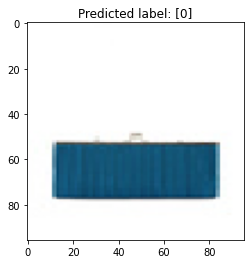

In [ ]:
# Top 5 Product and pridicted label
for index, distance, i in distance_df_sort.itertuples():
    img_c = image.load_img('/content/myntradataset/images/'+str(i)+'.jpg',target_size=(96,96,3))
    img_c = image.img_to_array(img_c)
    # Normalizing
    img_c = img_c/255
    img_c = np.array(img_c)
    img_cd = np.expand_dims(img_c, axis=0)
    p = model.predict(img_cd).argmax(axis=1)

    plt.figure(index)
    plt.title('Predicted label: ' + str(p))
    plt.imshow(img_c)

--------------------------------------------------------------------------------
--------------------------------------------------------------------------------

Colour Clustering using MiniSom 

In [ ]:
!pip install MiniSom

  Created wheel for MiniSom: filename=MiniSom-2.2.9-py3-none-any.whl size=8594 sha256=1341f0b01390df347422888c4aa32533246d9e02352fab8942b9db7acfd9e556
  Stored in directory: /root/.cache/pip/wheels/3d/a1/10/f50b6f4865652eac239a2700de411c3078c27e1318320e494c
Successfully built MiniSom


In [ ]:
# SOM

from minisom import MiniSom

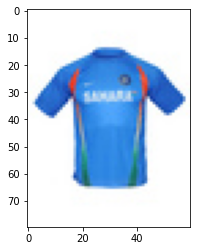

(80, 60, 3)

In [ ]:
img = mpimg.imread('/content/myntradataset/images/1163.jpg')
imgplot = plt.imshow(img)
plt.show()
img.shape

In [ ]:
img1 = cv2.imread('/content/images/1163.jpg', cv2.IMREAD_UNCHANGED)
img1.shape

(80, 60, 3)

training...
 [   774 / 10000 ]   8% - 0:00:02 left 

/usr/local/lib/python3.7/dist-packages/minisom.py:154: UserWarning: Warning: sigma is too high for the dimension of the map.
  warn('Warning: sigma is too high for the dimension of the map.')


 [ 10000 / 10000 ] 100% - 0:00:00 left 
 quantization error: 0.4264954533272669
quantization...
building new image...
done.


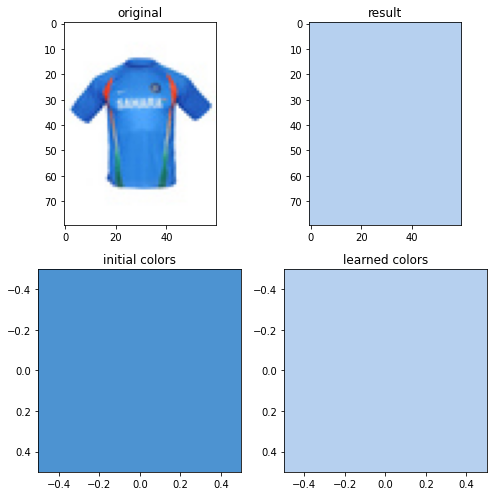

In [ ]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# reshaping the pixels matrix
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 3)) / 255.

# SOM initialization and training
print('training...')
som = MiniSom(1, 1, 3, sigma=1.,
              learning_rate=0.2, neighborhood_function='bubble')  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train(pixels, 10000, random_order=True, verbose=True)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(img.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q
print('done.')

# show the result
plt.figure(figsize=(7, 7))
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(img)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

In [ ]:
# Extracted colour feature
print(som.get_weights())

[[[0.71491644 0.81701362 0.93946947]]]


In [ ]:
print(qnt.shape)

(4800, 3)
